
#  <font color="#480000"> Making Mosaics with Archived Image Data Sets

This notebook uses a utility function, Mosaic, (included with the notebook) to build mosaics according to the user's specification of region center, size, and coordinate system for the following image datasets: 2MASS, WISE, SDSS, DSS, Spitzer IRAC and Spitzer MIPS. The processing is performed with the Montage Image Mosaic Engine, and includes all the steps needed to create image mosaics, including: acquiring images, reprojecting images, matching backgrounds between images, and co-adding the processed images. 

By design, Mosaic supports only the most commonly used mosaic parameters.  Users wishing to create mosaics at specific image projections and pixel scales, or wishing to mosaic their own data, should use the individual modules in the Montage C code (download from http://montage.ipac.caltech.edu/docs/download2.html or  https://github.com/Caltech-IPAC/Montage) or the Montage Python binary extensions, accessible from PyPI via pip install MontagePy.

In this notebook, we create and visualize the following mosaics of M31
 <ul>
    <li> [A mosaic of M31 with WISE images in Band 1 (3.4 um).](#wise1) </li>
    <li> [A three-color mosaic of M31 in WISE Bands 1 (3.4 um), 3 (12 um) and 4 (22 um).](#wise_color) </li>
</ul>

These examples can be easily adapted to create mosaics of the other supported data sets.

<br/>
###  <font color="#480000"> Available mosaicking parameters
    
Run the following cell to see a list of input parameters for the Mosaic object:

In [1]:
%pycat parameters.txt

<br/>
###  <font color="#480000"> Supported archive datasets
    
Run the following cell to get a list of available archive datasets:

In [2]:
%pycat datasets.txt

###  <font color="#480000"> Requirements
Install MontagePy, a set of Python binary extensions of existing Montage modules: "pip install MontagePy"

###  <font color="#480000"> A note on processing times
Mosaics can sometimes take require long image download or processing times. This is especially the case if networks are slow, or your mosaics are larger then 1 or 2 degrees, or -- for the Spitzer data especially --  there is   dense sky coverage at your location. There are no limits on image size, so please be patient if your network is slow or you are requesting a large mosaic.  Times mentioned here are based on mosaics we have made from our homes on laptops with 2.4 GHz Quad-Core Intel Core i5 proecessors. 

<br/>
<a id='wise1'></a>
<br/>
<hr/>
##  <font color="#480000"> WISE Mosaic of M31
### <font color="#480000"> WISE Band 1

Note that processing may take 2-3 minutes depending on your network bandwidth and processor speed.
We recommend setting the verbose option to'True' so you can follow the processing steps.

In [3]:
from Mosaic import Mosaic

location = 'M31'

dataset1 = 'WISE W1'

size = 2.0

Mosaic(location=location, dataset=dataset1, size=size, outfile='band1.fits', verbose=True)

'Constructing region header specification ...'

'Downloading image data ...'

'Collecting metadata for 4 images ...'

'Reprojecting images ...'

'Collecting projected image metadata ...'

'Determining image overlaps for background modeling ...'

'Analyzing 5 image overlaps ...'

'Modeling background corrections ...'

'Applying background corrections ...'

'Collecting corrected image metadata ...'

'Coadding corrected images into final mosaic ...'

'Final mosaic image: band1.fits'

<br/>
###  <font color="#480000"> Visualizing the Mosaic

We will use mViewer, the FITS image renderer provide with Montage, to visualize the image

In [4]:
from MontagePy.main import mViewer
from IPython.display import Image

status = mViewer('-ct 1 -gray band1.fits -2s max gaussian-log', 'band1.png', mode=2)

Now we can use a built-in notebook PNG viewer to visualize it.

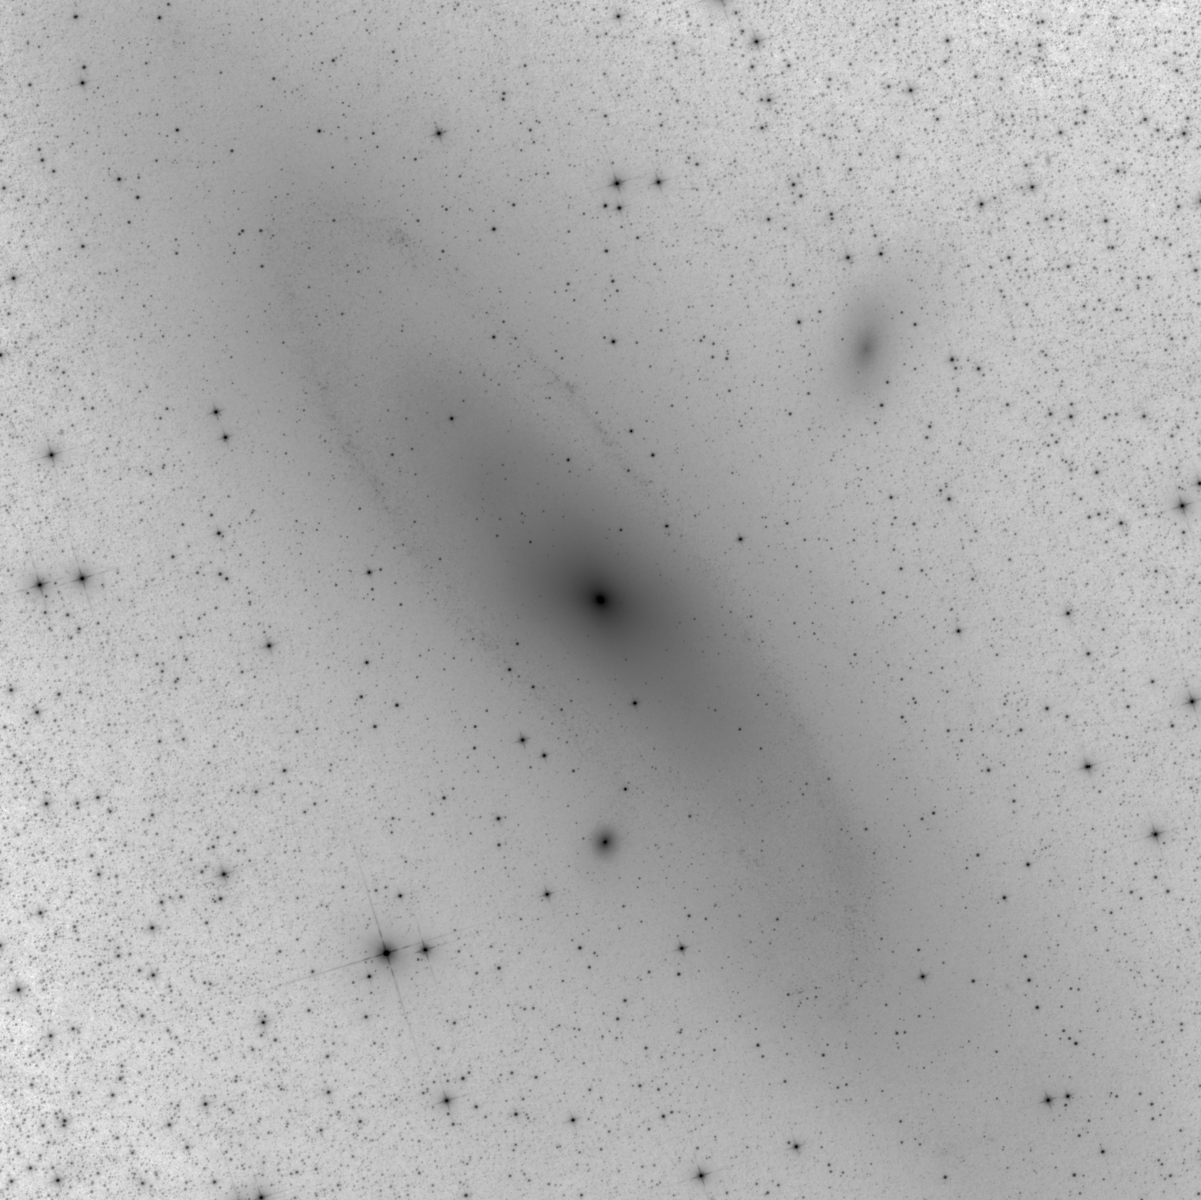

In [5]:
Image(filename='band1.png')

<br/>
<a id='wise_color'></a>
<br/>
###  <font color="#480000"> Three color WISE image mosaic 

To make a full-color image, make sure you have run the section above, then process bands W3 and W4 here, and finally create a 3-color PNG from our three images.

In [6]:
dataset2 = 'WISE W3'

Mosaic(location=location, dataset=dataset2, size=size, outfile='band2.fits', verbose=False)

'Final mosaic image: band2.fits'

In [7]:
dataset3 = 'WISE W4'

Mosaic(location=location, dataset=dataset3, size=size, outfile='band3.fits', verbose=False)

'Final mosaic image: band3.fits'

<br/>

###  <font color="#480000"> Creating a 3-color PNG image of M31

In addition to the simple grayscale representation above, mViewer can combine multiple wavelengths into a color image. 

For maximum flexibility, mViewer has two parameter input modes.  The simpler one (used above) places parameters in a string.  For complex sets of parameters, we will use instead the JSON mode to describe the image parameters: 

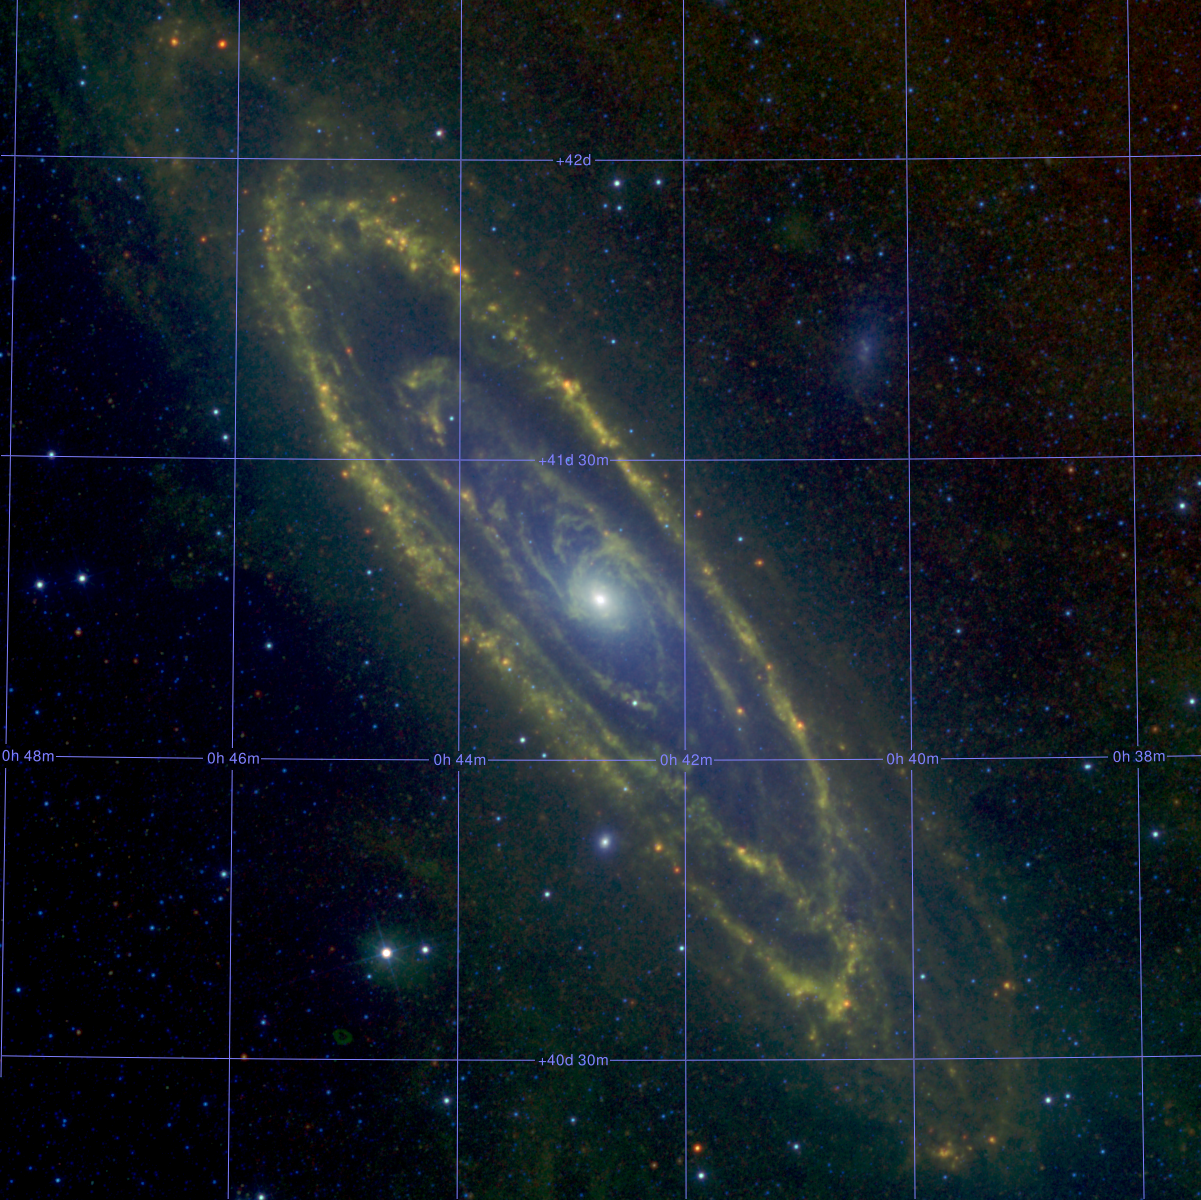

In [8]:
from MontagePy.main import mViewer
from IPython.display import Image

imgjson = """
{
   "image_type":"png",

    "blue_file":{"fits_file":"band1.fits", "stretch_min":"-0.3s", "stretch_max":"max", "stretch_mode":"gaussian-log"},
   "green_file":{"fits_file":"band2.fits", "stretch_min":"-0.3s", "stretch_max":"max", "stretch_mode":"gaussian-log"},
     "red_file":{"fits_file":"band3.fits", "stretch_min":"-0.3s", "stretch_max":"max", "stretch_mode":"gaussian-log"},
   
     "overlays":[
      {"type":"grid", "coord_sys": "Equ J2000", "color":"8080ff"}
     ]   
}
"""

rtn = mViewer(imgjson, 'color.png', mode=1) 

Image(filename='color.png')

<br/>
<hr/>

##  <font color="#480000"> More Information ...
    
 <font color="#480000"> Visit the Montage web page at http://montage.ipac.caltech.edu. 

 <font color="#480000"> Need help? Send a request to our Help Desk at http://vaoweb3.ipac.caltech.edu/cgi-bin/Helpdesk/nph-genTicketForm?projname=Montage&projmail=montage@ipac.caltech.edu

 <font color="#480000"> If your research uses Montage, please include the following acknowledgement in your paper: "This research made use of Montage. It has been funded by the National Science  Foundation under Grant Numbers ACI-1440620 ACI- 1642453, and ACI-1835379 and was previously funded by  the National Aeronautics and Space Administration's Earth Science  Technology Office, Computation Technologies Project, under Cooperative  Agreement Number NCC5-626 between NASA and the California Institute of  Technology."
    
<font color="#480000"> This service was developed by Pedro Castaneda under the auspices of the Summer Research Connection (SRC), which enables high school students to participate in research at Caltech
(https://ctlo.caltech.edu/outreach/summerprograms/summer-research-connection).

 



